<a href="https://colab.research.google.com/github/rkronit/StockPrice_analysis/blob/main/NVDA_Stock_one_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('/content/NVDA.csv')

In [30]:
df.head()

,Date,Close,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,6/13/2023,41.021999,NaN,NaN,NaN
1,6/14/2023,42.997002,NaN,NaN,NaN
2,6/15/2023,42.653000,NaN,NaN,NaN
3,6/16/2023,42.692001,NaN,NaN,NaN
4,6/20/2023,43.807999,NaN,NaN,NaN


In [31]:
df.tail()

,Date,Close,Unnamed: 2,Unnamed: 3,Unnamed: 4
247,6/6/2024,120.998001,NaN,NaN,NaN
248,6/7/2024,120.888000,NaN,NaN,NaN
249,6/10/2024,121.790001,NaN,NaN,NaN
250,6/12/2024,125.199997,NaN,NaN,NaN
251,NaN,NaN,NaN,NaN,NaN


In [32]:
df.isnull()

,Date,Close,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
247,False,False,True,True,True
248,False,False,True,True,True
249,False,False,True,True,True
250,False,False,True,True,True


In [33]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [34]:
df.head()

,Date,Close
0,6/13/2023,41.021999
1,6/14/2023,42.997002
2,6/15/2023,42.653000
3,6/16/2023,42.692001
4,6/20/2023,43.807999


In [35]:

from datetime import datetime

In [36]:
print(df.keys())

Index(['Date', 'Close'], dtype='object')


In [39]:
nvda_close = df[['Close']]

In [40]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

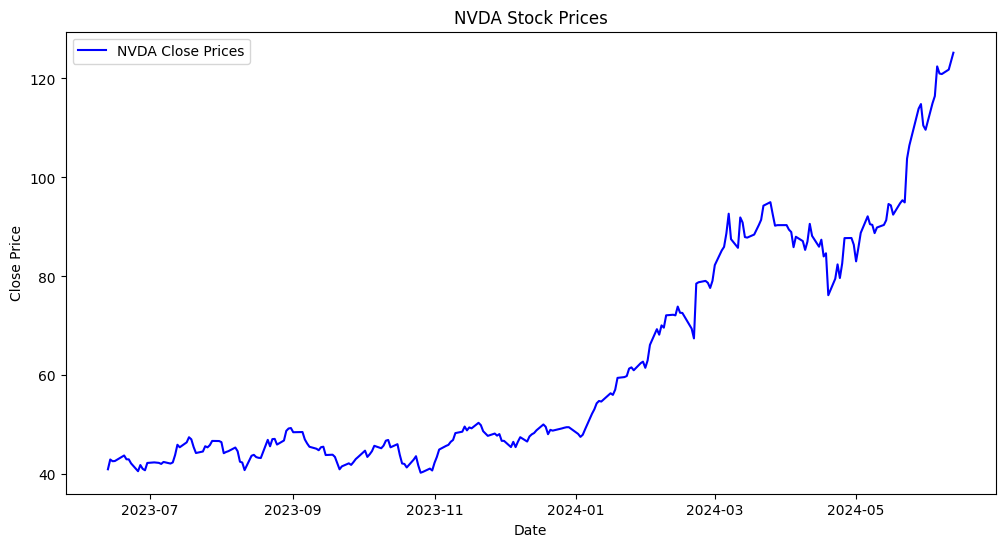

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='NVDA Close Prices', color='blue')
plt.title('NVDA Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [44]:
df["Close"] = pd.to_numeric(df["Close"])

In [47]:
print(df["Close"].head())

Date
2023-06-13    41.021999
2023-06-14    42.997002
2023-06-15    42.653000
2023-06-16    42.692001
2023-06-20    43.807999
Name: Close, dtype: float64


In [48]:
df = df.dropna(subset=['Close'])  # Removes rows where 'Close' has NaNs

In [49]:
from statsmodels.tsa.stattools import kpss
stats, p, lags, critical_values = kpss(df["Close"], "ct")

<ipython-input-49-c0cc97264a44>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p, lags, critical_values = kpss(df["Close"], "ct")


In [50]:
stats

0.4773709863391812

In [51]:
p

0.01

In [52]:
critical_values

{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}

In [53]:
from statsmodels.tsa.stattools import adfuller

In [55]:
score = adfuller(df["Close"])

In [56]:
score

(2.328256913647785,
 0.9989724415338769,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 994.4439823599434)

In [57]:
df["Close_diff"] = df["Close"]-df["Close"].shift(1)
df["Close_diff"]

,Close_diff
Date,
2023-06-13,NaN
2023-06-14,1.975003
2023-06-15,-0.344002
2023-06-16,0.039001
2023-06-20,1.115998
...,...
2024-06-05,6.003006
2024-06-06,-1.442001
2024-06-07,-0.110001


<Axes: xlabel='Date'>

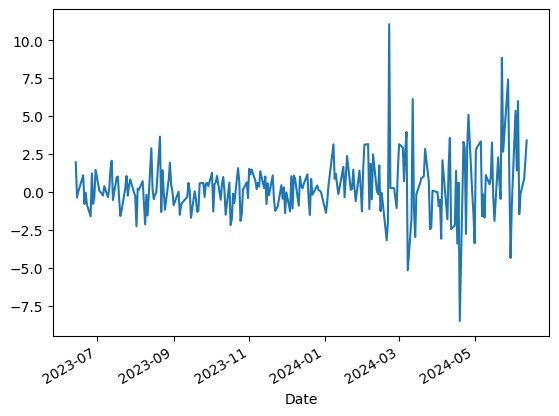

In [58]:
df["Close_diff"].dropna().plot()

In [59]:
score1 = adfuller(df["Close_diff"].dropna())
score1

(-3.6323290316993058,
 0.00517220879202538,
 7,
 242,
 {'1%': -3.457664132155201,
  '5%': -2.8735585105960224,
  '10%': -2.5731749894132916},
 992.9899301138136)

In [61]:
df["Close_diff5"] = df["Close"]-df["Close"].shift(5)
df["Close_diff5"]

,Close_diff5
Date,
2023-06-13,NaN
2023-06-14,NaN
2023-06-15,NaN
2023-06-16,NaN
2023-06-20,NaN
...,...
2024-06-05,7.615005
2024-06-06,10.498001
2024-06-07,11.254997


<Axes: xlabel='Date'>

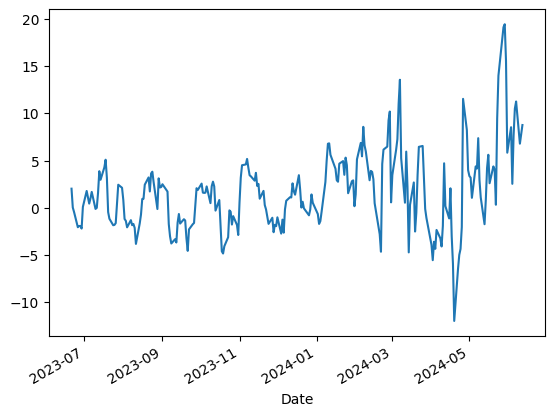

In [62]:
df["Close_diff5"].dropna().plot()

In [63]:
score5 = adfuller(df["Close_diff5"].dropna())
score5

(-1.513286527672906,
 0.5269287443801255,
 15,
 230,
 {'1%': -3.459105583381277,
  '5%': -2.8741898504150574,
  '10%': -2.5735117958412097},
 1014.2812946672125)

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

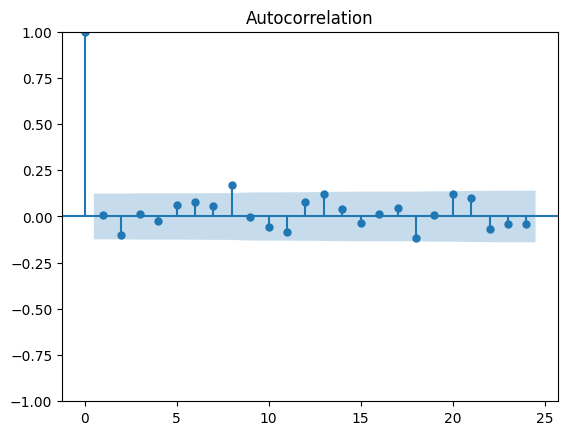

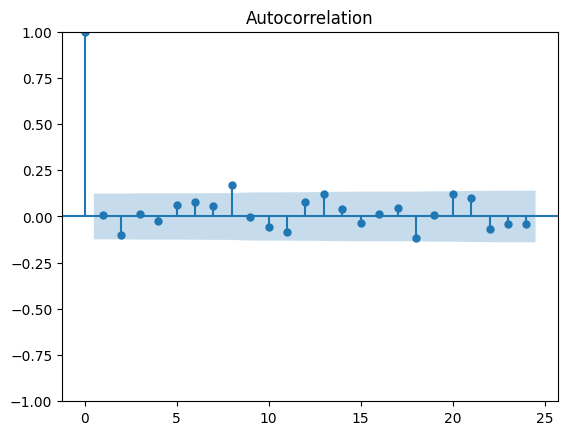

In [65]:
plot_acf(df["Close_diff"].dropna())

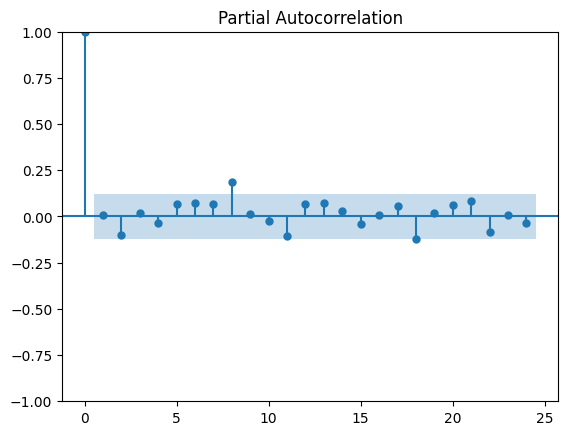

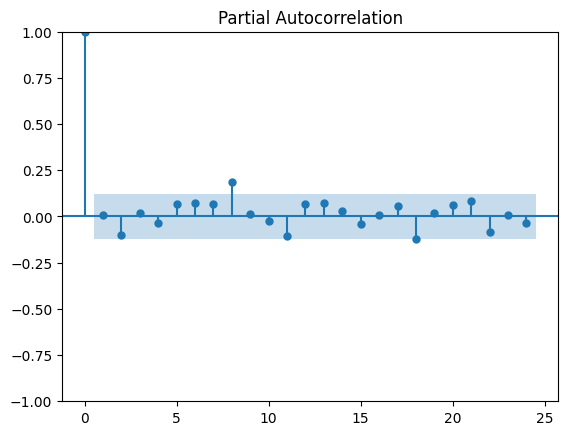

In [66]:
plot_pacf(df["Close_diff"].dropna())

In [67]:
from statsmodels.tsa.ar_model import AutoReg

In [68]:
model_ar = AutoReg(df["Close"],lags=1)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  251
Model:                     AutoReg(1)   Log Likelihood                -522.615
Method:               Conditional MLE   S.D. of innovations              1.957
Date:                Sat, 21 Dec 2024   AIC                           1051.230
Time:                        13:27:43   BIC                           1061.794
Sample:                             1   HQIC                          1055.482
                                  251                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3364      0.371     -0.906      0.365      -1.064       0.391
Close.L1       1.0109      0.006    178.341      0.000       1.000       1.022
                                    Roots           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


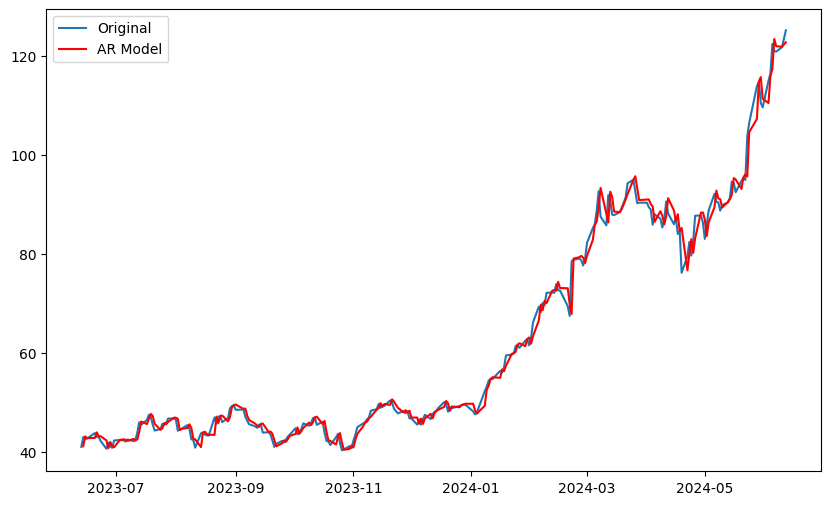

In [69]:
plt.figure(figsize=(10,6))
plt.plot(df["Close"],label="Original")
plt.plot(model_ar_fit.fittedvalues,color="red",label="AR Model")
plt.legend()
plt.show()

In [70]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA

In [71]:
order = (0,5,3) #(p,d,q)
model_ma = ARIMA(df["Close"],order=order)
model_ma_fit = model_ma.fit()
print(model_ma_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 5, 3)   Log Likelihood                -617.211
Date:                Sat, 21 Dec 2024   AIC                           1242.423
Time:                        13:29:13   BIC                           1256.444
Sample:                             0   HQIC                          1248.069
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.9843      0.371     -8.054      0.000      -3.711      -2.258
ma.L2          2.9807      0.736      4.052      0.000       1.539       4.423
ma.L3         -0.9964      0.369     -2.703      0.0

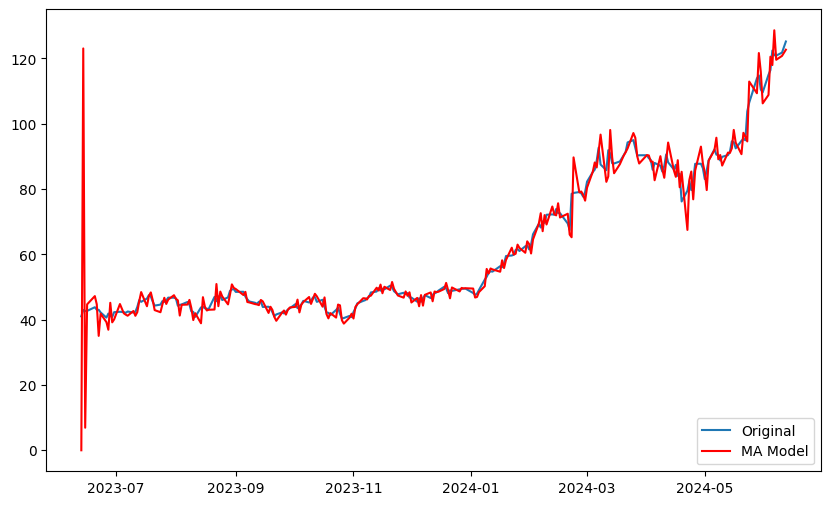

In [72]:
plt.figure(figsize=(10,6))
plt.plot(df["Close"],label="Original")
plt.plot(model_ma_fit.fittedvalues.dropna(),color="red",label="MA Model")
plt.legend()
plt.show()

In [73]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00


In [74]:
import numpy as np


In [75]:
from pmdarima.arima import auto_arima

In [76]:
autoarima_model = auto_arima(df["Close"],seasonal=False, stepwise=True, suppress_warnings = True)
order = autoarima_model.get_params()["order"]
print("Optimal ARIMA order is",order)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Optimal ARIMA order is (4, 2, 1)


In [77]:
model = ARIMA(df["Close"],order=order)
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -520.571
Date:                Sat, 21 Dec 2024   AIC                           1053.143
Time:                        13:31:33   BIC                           1074.248
Sample:                             0   HQIC                          1061.638
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0831      0.058     -1.444      0.149      -0.196       0.030
ar.L2         -0.1977      0.050     -3.923      0.000      -0.297      -0.099
ar.L3         -0.0748      0.064     -1.177      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [78]:
order = (2,0,3) #(p,d,q)
model_arma = ARIMA(df["Close"],order=order)
model_arma_fit = model_arma.fit()
print(model_arma_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -530.563
Date:                Sat, 21 Dec 2024   AIC                           1075.127
Time:                        13:32:07   BIC                           1099.805
Sample:                             0   HQIC                          1085.058
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3991    165.124      0.378      0.706    -261.239     386.037
ar.L1          0.0494      0.044      1.130      0.259      -0.036       0.135
ar.L2          0.9486      0.044     21.329      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
df["Close_diff10"] = df["Close"]-df["Close"].shift(10)
df["Close_diff10"]

,Close_diff10
Date,
2023-06-13,NaN
2023-06-14,NaN
2023-06-15,NaN
2023-06-16,NaN
2023-06-20,NaN
...,...
2024-06-05,27.054000
2024-06-06,26.048004
2024-06-07,17.088996


<Axes: xlabel='Date'>

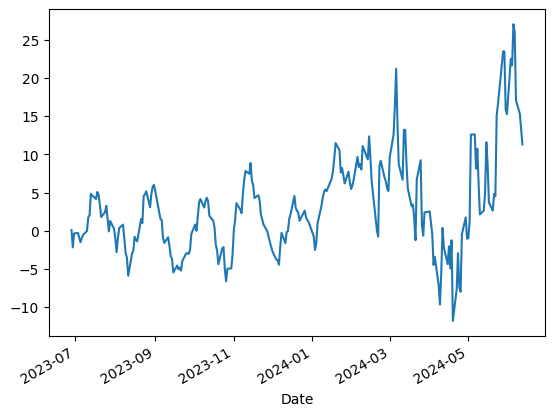

In [80]:
df["Close_diff10"].dropna().plot()

In [82]:
score10 = adfuller(df["Close_diff10"].dropna())
score10

(-1.2235150023828731,
 0.6633992455090748,
 11,
 229,
 {'1%': -3.4592326027153493,
  '5%': -2.8742454699025872,
  '10%': -2.5735414688888465},
 1021.2950020432481)

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

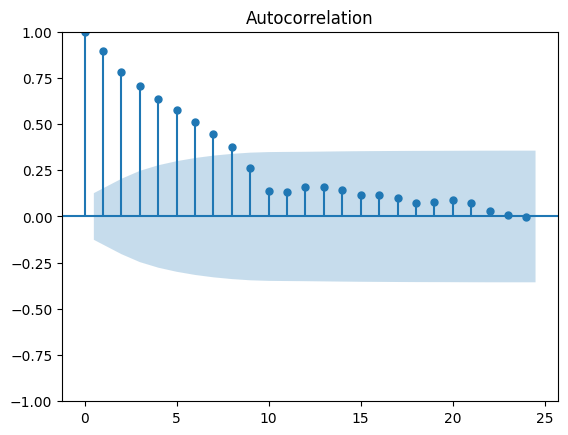

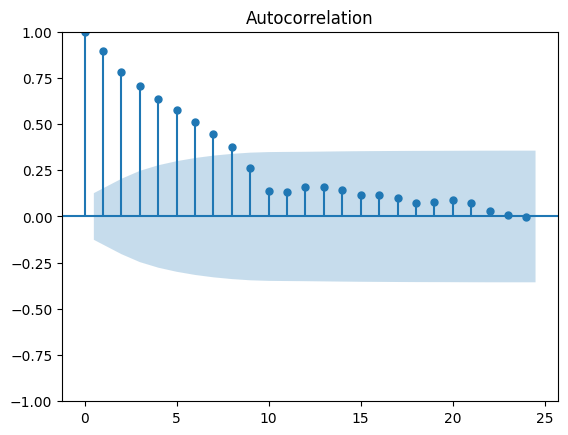

In [84]:
plot_acf(df["Close_diff10"].dropna())

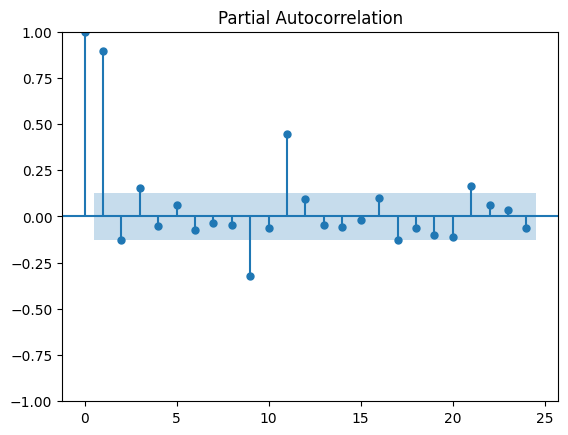

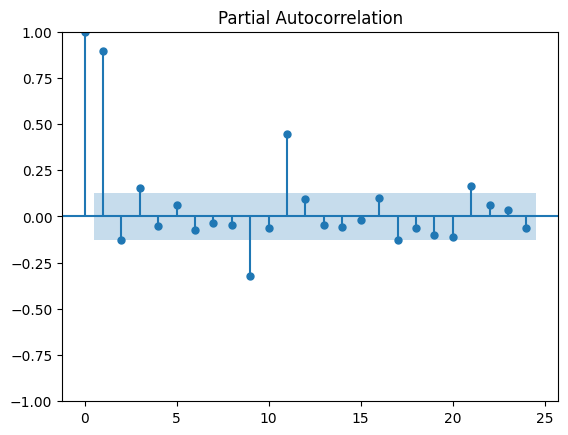

In [85]:
plot_pacf(df["Close_diff10"].dropna())

In [86]:
import statsmodels.api as sm
model_sarima = sm.tsa.statespace.SARIMAX(df["Close"],order=(0,1,0),seasonal_order=(0,1,0,24))
model_sarima_fit= model_sarima.fit()
model_sarima_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 24)   Log Likelihood                -552.277
Date:                            Sat, 21 Dec 2024   AIC                           1106.554
Time:                                    13:35:56   BIC                           1109.975
Sample:                                         0   HQIC                          1107.935
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.7641      0.309     25.090      0.000       7.158       8.371
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               788.13
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               7.95   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt


In [92]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [94]:
autoreg_lag = 1  # Replace with the best lag found
autoreg_model = AutoReg(train["Close"], lags=autoreg_lag)
autoreg_result = autoreg_model.fit()
autoreg_forecast = autoreg_result.forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

In [95]:
def calculate_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [99]:
arima_order = (0, 1, 0)  # Replace with the best order found
arima_model = ARIMA(train["Close"], order=arima_order)
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
arima_rmse = calculate_rmse(test["Close"], arima_forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [100]:
sarima_order = (1, 1, 1)  # Replace with the best order found
sarima_seasonal_order = (1, 1, 1, 12)  # Replace with the best seasonal order found
sarima_model = SARIMAX(train["Close"], order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=len(test))
sarima_rmse = calculate_rmse(test["Close"], sarima_forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-pack

In [96]:
autoreg_rmse = calculate_rmse(test["Close"], autoreg_forecast)

In [101]:
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"AutoReg RMSE: {autoreg_rmse}")

ARIMA RMSE: 13.799956113464404
SARIMA RMSE: 10.329104935216161
AutoReg RMSE: 13.836578784982503


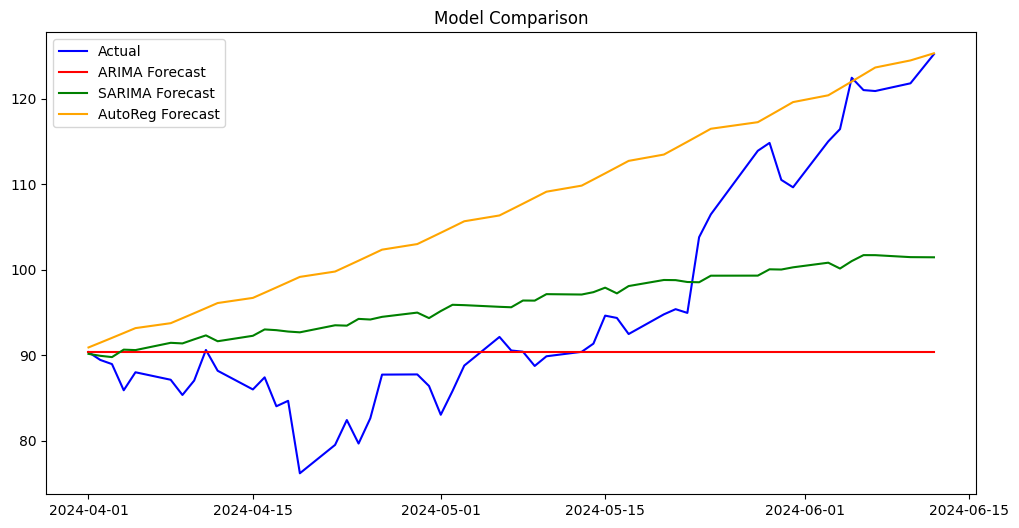

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test["Close"], label='Actual', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.plot(test.index, autoreg_forecast, label='AutoReg Forecast', color='orange')
plt.legend()
plt.title('Model Comparison')
plt.show()

In [105]:
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test))
print(sarima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  200
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -361.810
Date:                            Sat, 21 Dec 2024   AIC                            733.621
Time:                                    13:46:39   BIC                            749.776
Sample:                                         0   HQIC                           740.167
                                            - 200                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9530      0.110     -8.671      0.000      -1.168      -0.738
ma.L1          0.9993      2.081   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [106]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [107]:
next_day_forecast = sarima_fit.forecast(steps=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [121]:
forecast_horizon = 10
future_predictions = sarima_result.predict(start=len(df), end=len(df) + forecast_horizon - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [122]:
future_dates = pd.date_range(start=df.index[-1], periods=forecast_horizon + 1, freq='B')[1:]  # Business days

In [123]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_predictions})
forecast_df.set_index('Date', inplace=True)

In [124]:
forecast_df

,Forecast
Date,
2024-06-13,102.206833
2024-06-14,102.225564
2024-06-17,102.953640
2024-06-18,102.936827
2024-06-19,103.186093
2024-06-20,103.736567
2024-06-21,103.045504
2024-06-24,103.924894
2024-06-25,104.612915


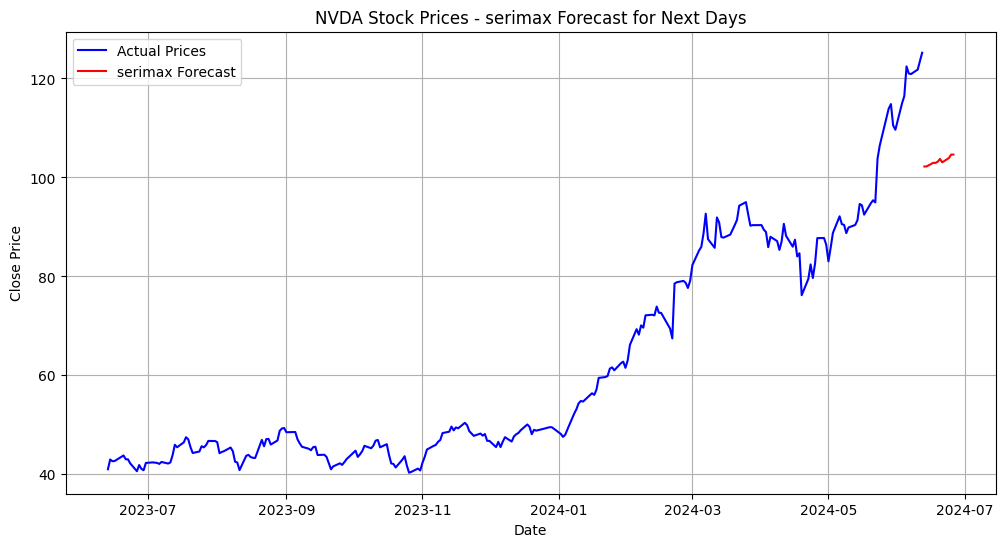

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label='Actual Prices', color='blue')  # Actual data
plt.plot(forecast_df.index, forecast_df['Forecast'], label='serimax Forecast', color='red')  # Forecast
plt.title('NVDA Stock Prices - serimax Forecast for Next Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# **Price of the next day is 102.206833**

**The code aims to predict the next day's closing price of NVIDIA (NVDA) stock using time series analysis. It leverages historical stock data, performs stationarity checks, explores different time series models (AR, ARIMA, SARIMA), evaluates their performance using RMSE, and ultimately uses the best-performing model (likely SARIMA) to forecast the next day's price. The final output is the one-day-ahead prediction, labeled as "One-day prediction:".**